<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6><span style="color:blue">Discretization</span></font></h1>
<h2 align=center><font size = 5>Lab Exercise 3.8</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning Made Easy<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this lab exercise, we will analyze different discretization methods.
In the first part of the exercise, we will focus on the unsupervised discretization methods, like binarization and binning. For this purpose, we will use a dataset containing house sale prices for King County, which includes homes sold between May 2014 and May 2015 (this is the same dataset used in the previous lab exercise).<br>
**Note**: *The original dataset can be downloaded from Kaggle at https://www.kaggle.com/harlfoxem/housesalesprediction.*

In the second part of the lab exercise, we will focus on the supervised discretization methods. Two of them will be discussed, entropy-based and ChiMerge discretization. Both of them will use Fisher's iris dataset, which is included in the *scikit-learn* library.

**Note:** *This lab exercise focuses on teaching the theory through coding and does not have in mind to present optimal coding.*

### Table of contents
1. [Binarization](#Binarization)
2. [Discretization with ordinal encoding](#DiscretizationOrdinal)
3. [Discretization with one-hot encoding](#DiscretizationOneHot)
4. [Entropy based binning](#EntropyBinning)
5. [ChiMerge discretization](#ChiMerge)

## 1. Binarization <a name="Binarization"></a>

Some machine learning algorithm only accepts categorical features. Thus, prior discretization of numerical (continuous) variables is essential. Even if it can handle continuous data, discretization of numerical variables often accelerates the learning process and may produce simpler and more accurate results.

During binarization, we create a binary variable from a continuous one. That always results in some information loss. However, it is up to you to decide - based on your domain-specific knowledge -  whether that information loss is compensated by a better fit of your model. 

Before moving on, as a first step, we import the required libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import os
%matplotlib inline

Let's use again the King County House Sales dataset introduced in the last lab exercise by reading into a pandas dataframe. 

In [2]:
data = pd.read_csv(os.path.join('data','HouseSalesKingCounty.csv'))
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Columns of the dataset:**
- **id** - A unique ID for each house sold
- **date** - The date of the home sale
- **price** - Price of each home sold (is the prediction target)
- **bedrooms** - Number of Bedrooms/House
- **bathrooms** - Number of bathrooms/House, where 0.5 accounts for a room with a toilet but no shower
- **sqft_living** - Square footage of the apartments interior living space
- **sqft_lot** - Square footage of the land space
- **floors** - Number of floors (levels) in the house
- **waterfront** - A binary variable for whether the house has a view to a waterfront or not
- **view** - An index from 0 to 4 of how good the view of the property was
- **condition** - An index from 1 to 5 on the condition of the apartment (the higher, the better)
- **grade** - the overall grade given to the housing unit, based on the King County grading system (the higher, the better) 
- **sqft_above** - Square footage of house apart from the basement (above ground level)
- **sqft_basement** - Square footage of the basement (below ground level)
- **yr_built** - The year the house was initially built
- **yr_renovated** - The year of the house's last renovation
- **zipcode** - What zip code area the house is in
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space of the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In lab exercise 3.7, we created a binary variable from the 'yr_renovated' numerical variable without any explanation why we did so. Now, we will explore the reasoning behind it. As a first step, let's check the number of unique values of this numerical variable.

In [3]:
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

As can be seen, only a few unique values are present. We may check the exact number of unique values.

In [4]:
len(data['yr_renovated'].unique())

70

This is a small number, especially if we consider that the overall number of observations is above 21 thousand. <br>
Now, let's see how many observations have a value different from zero for this variable.

In [5]:
print("Number of houses with a valid calendar year:",np.sum(data['yr_renovated']!=0))

Number of houses with a valid calendar year: 914


Thus, much more houses are recorded as being renovated than there are unique calendar years. <br>
Now, let's print out the percentage of this variable being different from zero.

In [6]:
data['renovated']=data['yr_renovated'].apply(lambda x: 1 if x>0 else 0)
print("Percentage of houses renovated: {:1.2f}%".format(data['renovated'].mean()*100))

Percentage of houses renovated: 4.23%


The percentage is below 5%. Now, let's plot the histogram using 10 bins.

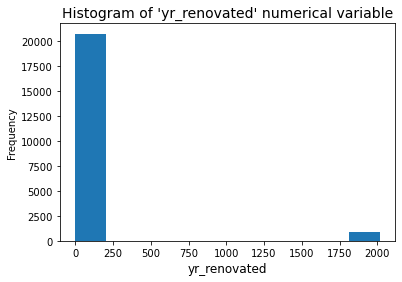

In [7]:
data['yr_renovated'].plot.hist(bins=10)
plt.title("Histogram of 'yr_renovated' numerical variable",fontsize=14)
plt.xlabel('yr_renovated',fontsize=12)
plt.show()

The histogram shows clearly that the distribution resembles a binary variable. A very similar result will be obtained if we change the number of bins to 20. 

Thus, it makes sense to use a binary variable instead (let's call it 'renovated'), which will be set to 1 if a valid calendar year is recorded and 0 otherwise. 
We already did this when we created the binary variable in the previous lab exercise. At this time, we may use the *scikit-learn* to binarize the data instead.

In [8]:
from sklearn.preprocessing import Binarizer
binarize=Binarizer(threshold=0)
binarize.fit_transform(np.array(data['yr_renovated']).reshape(-1, 1))

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

You may compare the two results (the one obtained with *pandas* 'apply' and the one with *scikit-learn*).

In [9]:
np.array_equal(np.array(data['renovated'])[:,np.newaxis],binarize.fit_transform(np.array(data['yr_renovated']).reshape(-1, 1)))

True

Because the point-biserial correlation is a special case of the Pearson correlation coefficient, we may check how the correlation is changed between 'yr_renovated' and the dependent variable 'price' after the binarization.

In [10]:
data[['price','yr_renovated','renovated']].corr()

,price,yr_renovated,renovated
price,1.000000,0.126434,0.126092
yr_renovated,0.126434,1.000000,0.999968
renovated,0.126092,0.999968,1.000000


From the above correlation matrix, we can observe that the original numerical variable 'yr_renovated' and the newly created binary variable 'renovated' is almost perfectly correlated (0.999968), while the correlation between the response variable and the input variable remained almost the same (decreased from 0.126434 to 0.126092 after binarization).

Now, let's build a linear model using the square foot of the living area and the year the house was renovated.

In [11]:
model = ols(formula = 'price ~ sqft_living + yr_renovated', data=data).fit()
print(model.summary(title="OLS results with numerical variables"))
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                     OLS results with numerical variables                     
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 1.083e+04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:53   Log-Likelihood:            -3.0010e+05
No. Observations:               21613   AIC:                         6.002e+05
Df Residuals:                   21610   BIC:                         6.002e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.631e+04   4371.844    -10.594   

For comparison, fit another linear model, but at this time replacing the year of renovation with the newly created binary variable 'renovated'.

In [12]:
model = ols(formula = 'price ~ sqft_living + renovated', data=data).fit()
print(model.summary(title="OLS results with binary variable"))
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                       OLS results with binary variable                       
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 1.083e+04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:53   Log-Likelihood:            -3.0010e+05
No. Observations:               21613   AIC:                         6.002e+05
Df Residuals:                   21610   BIC:                         6.002e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.633e+04   4372.000    -10.597      

As can be seen, the adjusted R-squared value and the RMSE remained the same (RMSE increased only by 0.003%).
In conclusion, it makes sense to binarize the 'yr_renovated' variable because the information loss is negligible in the case of the linear regression model. Moreover, the binarization makes the linear model more interpretable. That is, one of the predictors would be a binary variable stating whether the house was renovated or not, instead of having a numerical variable recording the year of the renovation (setting to 0, if it was not).

**Note:** *The standard deviation for the regression coefficients of the binary variable is much higher, so the precision of the predictability is decreased for the renovated houses.*

Now, let's create a column transformer and a pipeline. We may use the 'passthrough' internal transformer if we want a given variable not to be transformed.

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn import set_config
set_config(display='diagram')

linregr=LinearRegression()
ct = ColumnTransformer(transformers=[('notransf','passthrough',['sqft_living']),\
                                     ('binarizer',binarize,['yr_renovated'])])
pipe=Pipeline(steps=[('preproc',ct),('regr',linregr)])
pipe.fit(data,data['price'])

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('notransf', 'passthrough',
                                                  ['sqft_living']),
                                                 ('binarizer',
                                                  Binarizer(threshold=0),
                                                  ['yr_renovated'])])),
                ('regr', LinearRegression())])

Then, we may use the pipeline to fit the model and then predict.

**Note:** *Due to a scikit-learn internal error, the commented lines do not work.*

In [14]:
print("Regression coefficients:\n",pipe['regr'].intercept_)
print(pipe['regr'].coef_[:,np.newaxis])
#print("R-squared:",pipe['regr'].score(data,data['price']))
print("R-squared:",pipe['regr'].score(ct.transform(data),data['price']))
#r_=pipe['regr'].predict(data)[:,np.newaxis]-np.array(data['price'])[:,np.newaxis]
r_=pipe['regr'].predict(ct.transform(data))[:,np.newaxis]-np.array(data['price'])[:,np.newaxis]
print("RMSE:",float(np.sqrt(r_.T@r_/r_.shape[0])))

Regression coefficients:
 -46328.62851103372
[[   278.69261355]
 [159947.47939467]]
R-squared: 0.50051777088185
RMSE: 259457.68009860674


## 2. Discretization with ordinal encoding <a name="DiscretizationOrdinal"></a>

There are machine learning algorithms that require an input variable to be a categorical one. For such cases, the numerical variable needs to be transformed to a categorical one, and this transformation is called discretization. 
Let's create the history plot of the 'yr_built' input variable.

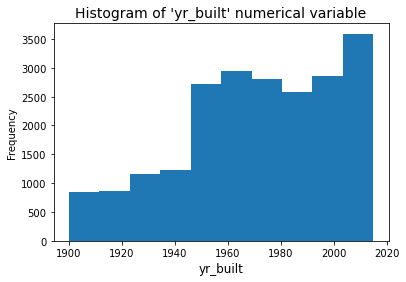

In [15]:
data['yr_built'].plot.hist()
plt.title("Histogram of 'yr_built' numerical variable",fontsize=14)
plt.xlabel('yr_built',fontsize=12)
plt.show()

Let's print out the OLS results using the *statsmodels* library with only two input variables: 'sqft_living' and 'yr_built':

In [16]:
model = ols(formula = 'price ~ sqft_living + yr_built', data=data).fit()
print(model.summary(title="OLS results with numerical variables"))
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                     OLS results with numerical variables                     
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 1.193e+04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:53   Log-Likelihood:            -2.9957e+05
No. Observations:               21613   AIC:                         5.991e+05
Df Residuals:                   21610   BIC:                         5.992e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.546e+06   1.21e+05     37.686      

This model can be used as a reference to compare the result of different discretization methods with a different number of bins. Again, discretization always results in some information loss. The reason that we may apply binning for this particular case is the following: the price of the house is dependent on age, but with some coarse granularity, i.e., we do not expect a price difference between a 15 years old house and 16 years old house, taking all other predictors the same.

As a first attempt, let's create three categories of ages: 'old', 'middle', and 'new'.

**Note:** *It should be observed that the regression coefficient for the 'yr_built' is negative, meaning that the newer the house, the lower the price. That sounds counterintuitive!*

The condition number is very high, so let's check the VIF values first.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=np.array(data[['sqft_living','yr_built']])
N,D=X.shape
Xdot=np.insert(X,0,np.ones(N),axis=1)

print("VIF for 'sqft_living':",variance_inflation_factor(Xdot,1))
print("VIF for 'yr_built':",variance_inflation_factor(Xdot,2))

VIF for 'sqft_living': 1.1125388934134084
VIF for 'yr_built': 1.1125388934134086


The VIF values are close to 1, meaning that there is no collinearity issue.

Now, let's discretize the input variable 'yr_built' using the *scikit-learn* library. As a first step, we will use equal-width binning (also called uniform discretization) with only three binning (or intervals). The created categorical variable will be treated as an ordinal one.

In [18]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer=KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
data['yrbuiltCat']=discretizer.fit_transform(np.array(data['yr_built']).reshape(-1, 1))
sorted(data['yrbuiltCat'].unique())

[0.0, 1.0, 2.0]

We may obtain the bin edges, as well:

In [19]:
discretizer.bin_edges_

array([array([1900.        , 1938.33333333, 1976.66666667, 2015.        ])],
      dtype=object)

The *pandas* library also supports the equal-width discretization using the *cut* method:

In [20]:
pd.cut(data['yr_built'],bins=3)

0        (1938.333, 1976.667]
1        (1938.333, 1976.667]
2        (1899.885, 1938.333]
3        (1938.333, 1976.667]
4          (1976.667, 2015.0]
                 ...         
21608      (1976.667, 2015.0]
21609      (1976.667, 2015.0]
21610      (1976.667, 2015.0]
21611      (1976.667, 2015.0]
21612      (1976.667, 2015.0]
Name: yr_built, Length: 21613, dtype: category
Categories (3, interval[float64]): [(1899.885, 1938.333] < (1938.333, 1976.667] < (1976.667, 2015.0]]

So far so good. Now, let's print out the OLS results using the ordinal variable.

In [21]:
model = ols(formula = 'price ~ sqft_living + yrbuiltCat', data=data).fit()
print(model.summary(title="OLS results with ordinal variable"))
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                      OLS results with ordinal variable                       
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 1.195e+04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:54   Log-Likelihood:            -2.9956e+05
No. Observations:               21613   AIC:                         5.991e+05
Df Residuals:                   21610   BIC:                         5.991e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.059e+04   4793.328      8.469      

As can be seen, the adjusted R-squared and RMSE values remained almost the same (in fact, there is a very minor improvement in both of them when the discretized variable is used).
Now, let's define the eta correlation ratio between a numerical and categorical variable (the same function that we had in the previous lab exercise).

In [22]:
def eta2(categorical, numerical):
    cat_enc, _ = pd.factorize(categorical) # make sure that categorical variables are encoded
    num_cat=np.max(cat_enc)+1
    yc_avg=np.zeros(num_cat)
    Nc=np.zeros(num_cat)  
    for c in range(num_cat):
        yc_obs=numerical[np.argwhere(cat_enc == c).flatten()]
        yc_avg[c]=np.mean(yc_obs) # Calculate the mean of the observations for a given categorical value
        Nc[c]=len(yc_obs)         # Calculate the number of observations for a given categorical value
    y_avg=np.sum(Nc*yc_avg)/np.sum(Nc) # Calculate the overall mean
    return np.sum(Nc*(yc_avg-y_avg)**2)/np.sum((numerical-y_avg)**2) # Calculate eta according to the formula from the book

Then let's see how the correlation ratio between the discretized and its original variable 'yr_built', respective the correlation ratio between the discretized and dependent variable 'price' changes over the total number of bins (intervals) selected during the discretization process. At the same time, we may also print out the goodness-of-fit for the linear model with two input variables: 'sqft_livig' and 'yrbuiltCat'.

In [23]:
print("Results for uniform binning:")
print("============================")
for k in range(3,12,2):
    discretizer=KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='uniform')
    data['yrbuiltCat']=discretizer.fit_transform(np.array(data['yr_built']).reshape(-1, 1))
    print("\nNr. of bins =",k)
    print('Correlation ratio, eta, btw. the discretized and its original variable: {:.3f}'\
          .format(np.sqrt(eta2(data['yrbuiltCat'],data['yr_built']))))
    print('Correlation ratio, eta, btw. the discretized and dependent variable: {:.3f}'\
          .format(np.sqrt(eta2(data['yrbuiltCat'],data['price']))))
    model = ols(formula = 'price ~ sqft_living + yrbuiltCat', data=data).fit()
    print("R-squared adjusted = {:.3f}".format(model.rsquared_adj))
    print("RMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

Results for uniform binning:

Nr. of bins = 3
Correlation ratio, eta, btw. the discretized and its original variable: 0.931
Correlation ratio, eta, btw. the discretized and dependent variable: 0.150
R-squared adjusted = 0.525
RMSE = 253004

Nr. of bins = 5
Correlation ratio, eta, btw. the discretized and its original variable: 0.975
Correlation ratio, eta, btw. the discretized and dependent variable: 0.153
R-squared adjusted = 0.523
RMSE = 253586

Nr. of bins = 7
Correlation ratio, eta, btw. the discretized and its original variable: 0.988
Correlation ratio, eta, btw. the discretized and dependent variable: 0.171
R-squared adjusted = 0.524
RMSE = 253358

Nr. of bins = 9
Correlation ratio, eta, btw. the discretized and its original variable: 0.992
Correlation ratio, eta, btw. the discretized and dependent variable: 0.175
R-squared adjusted = 0.525
RMSE = 252922

Nr. of bins = 11
Correlation ratio, eta, btw. the discretized and its original variable: 0.995
Correlation ratio, eta, btw. th

From the above list, we may conclude that both correlation ratios increase with the total number of bins. That should not be a surprise as (by increasing the number of bins, the information loss is less). However, this is not true for the linear model goodness-of-fit.

Similarly, we may print out the correlation ratios, respective the linear model goodness-of-fit when the equal-frequency binning (or quantile discretization) is selected for different bin numbers. Again, the created categorical variable will be treated as an ordinal variable.

In [24]:
print("Results for quantile binning:")
print("=============================")
for k in range(3,12,2):
    discretizer=KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='quantile')
    data['yrbuiltCat']=discretizer.fit_transform(np.array(data['yr_built']).reshape(-1, 1))
    print("\nNr. of bins =",k)
    print('Correlation ratio, eta, btw. the discretized and its original variable: {:.3f}'\
          .format(np.sqrt(eta2(data['yrbuiltCat'],data['yr_built']))))
    print('Correlation ratio, eta, btw. the discretized and dependent variable: {:.3f}'\
          .format(np.sqrt(eta2(data['yrbuiltCat'],data['price']))))
    model = ols(formula = 'price ~ sqft_living + yrbuiltCat', data=data).fit()
    print("R-squared adjusted = {:.3f}".format(model.rsquared_adj))
    print("RMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

Results for quantile binning:

Nr. of bins = 3
Correlation ratio, eta, btw. the discretized and its original variable: 0.917
Correlation ratio, eta, btw. the discretized and dependent variable: 0.137
R-squared adjusted = 0.520
RMSE = 254299

Nr. of bins = 5
Correlation ratio, eta, btw. the discretized and its original variable: 0.968
Correlation ratio, eta, btw. the discretized and dependent variable: 0.152
R-squared adjusted = 0.519
RMSE = 254679

Nr. of bins = 7
Correlation ratio, eta, btw. the discretized and its original variable: 0.985
Correlation ratio, eta, btw. the discretized and dependent variable: 0.173
R-squared adjusted = 0.519
RMSE = 254613

Nr. of bins = 9
Correlation ratio, eta, btw. the discretized and its original variable: 0.989
Correlation ratio, eta, btw. the discretized and dependent variable: 0.165
R-squared adjusted = 0.519
RMSE = 254682

Nr. of bins = 11
Correlation ratio, eta, btw. the discretized and its original variable: 0.992
Correlation ratio, eta, btw. t

Again, we may conclude that the correlation ratios increase with the number of bins (by increasing the number of bins, the information loss is less). However, this is not true for the linear model goodness-of-fit.

Using the formula of Dougherty, the following value for the number of bins should be optimal.

In [25]:
N,_=data.shape
max(1,2*np.log10(N))

8.669430106928717

That is approximately nine bins.

Finally, we can print out the correlation ratios, respective the linear model goodness-of-fit when the k-means binning (or k-means discretization) is selected for the different number of bins. Again, the created categorical variable will be treated as an ordinal variable.

**Note:** *k-means binning or discretization is based on k-means clustering, an unsupervised machine learning algorithm discussed in the third volume of the book series.*

In [26]:
print("Results for k-means binning:")
print("============================")
for k in range(3,12,2):
    discretizer=KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='kmeans')
    data['yrbuiltCat']=discretizer.fit_transform(np.array(data['yr_built']).reshape(-1, 1))
    print("\nNr. of bins =",k)
    print('Correlation ratio, eta, btw. the discretized and its original variable: {:.3f}'\
          .format(np.sqrt(eta2(data['yrbuiltCat'],data['yr_built']))))
    print('Correlation ratio, eta, btw. the discretized and dependent variable: {:.3f}'\
          .format(np.sqrt(eta2(data['yrbuiltCat'],data['price']))))
    model = ols(formula = 'price ~ sqft_living + yrbuiltCat', data=data).fit()
    print("R-squared adjusted = {:.3f}".format(model.rsquared_adj))
    print("RMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

Results for k-means binning:

Nr. of bins = 3
Correlation ratio, eta, btw. the discretized and its original variable: 0.933
Correlation ratio, eta, btw. the discretized and dependent variable: 0.167
R-squared adjusted = 0.521
RMSE = 254129

Nr. of bins = 5
Correlation ratio, eta, btw. the discretized and its original variable: 0.979
Correlation ratio, eta, btw. the discretized and dependent variable: 0.167
R-squared adjusted = 0.526
RMSE = 252853

Nr. of bins = 7
Correlation ratio, eta, btw. the discretized and its original variable: 0.988
Correlation ratio, eta, btw. the discretized and dependent variable: 0.173
R-squared adjusted = 0.524
RMSE = 253271

Nr. of bins = 9
Correlation ratio, eta, btw. the discretized and its original variable: 0.992
Correlation ratio, eta, btw. the discretized and dependent variable: 0.175
R-squared adjusted = 0.526
RMSE = 252886

Nr. of bins = 11
Correlation ratio, eta, btw. the discretized and its original variable: 0.995
Correlation ratio, eta, btw. th

The same conclusion can be drawn as previously: both correlation ratios increase with the number of bins (by increasing the number of bins the information loss is less). However, this is not true for the linear model goodness-of-fit.

Looking at the overall results, the best goodness-of-fit is obtained with *k-means binning* using 5 intervals.<br>
Let's print out the OLS results using *statsmodels* library.

In [27]:
discretizer=KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data['yrbuiltCat']=discretizer.fit_transform(np.array(data['yr_built']).reshape(-1, 1))
model = ols(formula = 'price ~ sqft_living + yrbuiltCat', data=data).fit()
print(model.summary())
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                 1.198e+04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:55   Log-Likelihood:            -2.9954e+05
No. Observations:               21613   AIC:                         5.991e+05
Df Residuals:                   21610   BIC:                         5.991e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.415e+04   4603.927      5.246      

In a conclusion, although information is lost during discretization, a very minor improvement (although is negligible) in the model goodness-of-fit could be achieved with the appropriate selection of discretization method and number of bins.

Finally, let's create a pipeline where the column transformer has both the 'binarizer' and 'discretizer' transformations included.

In [28]:
ct = ColumnTransformer(transformers=[('notransf','passthrough',['sqft_living']),\
                                     ('binarizer',binarize,['yr_renovated']),\
                                     ('discretizer',discretizer,['yr_built'])])
pipe=Pipeline(steps=[('preproc',ct),('regr',linregr)])
pipe.fit(data,data['price'])

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('notransf', 'passthrough',
                                                  ['sqft_living']),
                                                 ('binarizer',
                                                  Binarizer(threshold=0),
                                                  ['yr_renovated']),
                                                 ('discretizer',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='kmeans'),
                                                  ['yr_built'])])),
                ('regr', LinearRegression())])

Then using this pipeline, we can print out the regression coefficients and model goodness-of-fit. 

In [29]:
print("Regression coefficients:\n",pipe['regr'].intercept_)
print(pipe['regr'].coef_[:,np.newaxis])
#print("R-squared:",pipe['regr'].score(data,data['price']))
print("R-squared: {:.3f}".format(pipe['regr'].score(ct.transform(data),data['price'])))
#r_=pipe['regr'].predict(data)[:,np.newaxis]-np.array(data['price'])[:,np.newaxis]
r_=pipe['regr'].predict(ct.transform(data))[:,np.newaxis]-np.array(data['price'])[:,np.newaxis]
print("RMSE = {:.0f}".format(float(np.sqrt(r_.T@r_/r_.shape[0]))))

Regression coefficients:
 18534.847576160566
[[   303.38787345]
 [ 81663.38309027]
 [-47812.889909  ]]
R-squared: 0.528
RMSE = 252337


We may compare the OLS results of the model using numerical variables with the model using their discretized counterparts.
For this we use the three numeric input variables first: 'sqft_living', 'yr_renovated', and 'yr_built'.

In [30]:
model = ols(formula = 'price ~ sqft_living + yr_renovated + yr_built', data=data).fit()
print(model.summary(title="OLS results with numerical variables"))
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                     OLS results with numerical variables                     
Dep. Variable:                  price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     8013.
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:55   Log-Likelihood:            -2.9952e+05
No. Observations:               21613   AIC:                         5.991e+05
Df Residuals:                   21609   BIC:                         5.991e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.249e+06   1.25e+05     34.105   

Now print out the OLS results using the discretized counterparts (except for 'sqft_living): 'renovated' and 'yrbuiltCat'.

In [31]:
model = ols(formula = 'price ~ sqft_living + renovated + yrbuiltCat', data=data).fit()
print(model.summary(title="OLS results with binary and ordinal variables"))
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                OLS results with binary and ordinal variables                 
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     8043.
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:55   Log-Likelihood:            -2.9950e+05
No. Observations:               21613   AIC:                         5.990e+05
Df Residuals:                   21609   BIC:                         5.990e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.853e+04   4634.873      3.999      

Finally, we may compare the Spearman correlation coefficient between the input numerical variables 'yr_renovated' and 'yr_built'

In [32]:
print("Spearman correlation between 'yr_renovated' and 'yr_built':",\
      np.array(data[['yr_renovated','yr_built']].corr(method='spearman'))[0,1])

Spearman correlation between 'yr_renovated' and 'yr_built': -0.2145042001694274


respective between categorical variables 'renovated' and 'yrbuiltCat':

In [33]:
print("Spearman correlation between 'renovated' and 'yrbuiltCat':",\
      np.array(data[['renovated','yrbuiltCat']].corr(method='spearman'))[0,1])

Spearman correlation between 'renovated' and 'yrbuiltCat': -0.21298609971429117


As can be seen, there is only a small change in the Spearman correlation coefficient after discretization. That should not be a surprise because the Spearman correlation is based on ranking, and that is only partly changed by discretization (with discretization, several tied ranks are created).

## 3. Discretization with one-hot encoding <a name="DiscretizationOneHot"></a>

As a reminder, the regression coefficient of the 'yr_built' is negative, which is counterintuitive, since that means - all other predictors being the same -, the newer the house, the lower the price. 

Now, using our domain knowledge, we might observe that very old houses are in the downtown and the houses in the city center always have higher prices compared to the houses sitting at the edge of the city. However, that is true only for downtown houses, and we should expect that a new house should have a higher price compared to a 10-year-old house in the same area. That means that the categorical variable 'yrbuiltCat' should not be encoded as ordinal but rather nominal because, even though the age (calendar year) is ordered, there should be no ordering between categories using our above reasoning.

Now, let's discretize the 'yr_built" again using three bins, but at this time as treating as a nominal variable, thus using one-hot encoding.

**Note:** *The scikit-lean library supports sparse matrixes (matrices with most of its elements being zero), so it makes a distinction between 'onehot' encoding (sparse matrix with some special coding to save memory space) or 'onehot-dense' (when a complete matrix is stored with all the zero elements included).* 

In [34]:
columns=['old','middleage','new'] # name of the categories
discretizer=KBinsDiscretizer(n_bins=len(columns), encode='onehot-dense', strategy='uniform')
data2=pd.DataFrame(data=discretizer.fit_transform(np.array(data['yr_built']).reshape(-1, 1)),columns=columns)
data2

,old,middleage,new
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
21608,0.0,0.0,1.0
21609,0.0,0.0,1.0
21610,0.0,0.0,1.0
21611,0.0,0.0,1.0


We can check the interval edges of each category:

In [35]:
for i in range(len(columns)):
    print({columns[i]:(discretizer.bin_edges_[0][i],discretizer.bin_edges_[0][i+1])})

{'old': (1900.0, 1938.3333333333333)}
{'middleage': (1938.3333333333333, 1976.6666666666667)}
{'new': (1976.6666666666667, 2015.0)}


The newly created dummy variables can be concatenated to the original *pandas* dataframe.

In [36]:
pd.concat([data,data2],axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,yrbuiltCat,old,middleage,new
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,0,1.0,0.0,1.0,0.0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,1,1.0,0.0,1.0,0.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,0,1.0,1.0,0.0,0.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,0,2.0,0.0,1.0,0.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,0,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,98103,47.6993,-122.346,1530,1509,0,4.0,0.0,0.0,1.0
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,98146,47.5107,-122.362,1830,7200,0,4.0,0.0,0.0,1.0
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,0,4.0,0.0,0.0,1.0
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,98027,47.5345,-122.069,1410,1287,0,4.0,0.0,0.0,1.0


Then we can print out the OLS results using the *statsmodels* library. In this case, the 'new' category will be the baseline in our regression model.

In [37]:
endformula=''.join([' + '+columns[i] for i in range(len(columns)-1)]) 
discretizer=KBinsDiscretizer(n_bins=len(columns), encode='onehot-dense', strategy='uniform')
data2=pd.DataFrame(data=discretizer.fit_transform(np.array(data['yr_built']).reshape(-1, 1)),columns=columns)
model = ols(formula = 'price ~ sqft_living'+ endformula, data=pd.concat([data,data2],axis=1)).fit()
print(model.summary(title="OLS results with nominal variable (bins=3)"))
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                  OLS results with nominal variable (bins=3)                  
Dep. Variable:                  price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     8024.
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:56   Log-Likelihood:            -2.9952e+05
No. Observations:               21613   AIC:                         5.990e+05
Df Residuals:                   21609   BIC:                         5.991e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.393e+05   5323.147    -26.174      

There is one strange thing: the regression coefficients become positive for 'old' and 'middleage' categories. For the original numerical variable, we had a negative coefficient. However, this is still in alignment, because we set 'new' as a reference level, and means that 'middleage' and 'old' categories provide a positive price increase compared to the reference level.

In [38]:
columns=['old','middleage','newlike','new']
endformula=''.join([' + '+columns[i] for i in range(len(columns)-1)]) 
discretizer=KBinsDiscretizer(n_bins=len(columns), encode='onehot-dense', strategy='uniform')
data2=pd.DataFrame(data=discretizer.fit_transform(np.array(data['yr_built']).reshape(-1, 1)),columns=columns)
model = ols(formula = 'price ~ sqft_living'+endformula, data=pd.concat([data,data2],axis=1)).fit()
print(model.summary())
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     6178.
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:56   Log-Likelihood:            -2.9936e+05
No. Observations:               21613   AIC:                         5.987e+05
Df Residuals:                   21608   BIC:                         5.988e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.468e+05   5648.101    -25.993      

Now, the picture is cleared, the older the house, the higher the extra money you pay. But that is still counterintuitive. So let's refine the categories further.

In [39]:
columns=['very_old','old','middleage','newlike','new']
endformula=''.join([' + '+columns[i] for i in range(len(columns)-1)]) 
discretizer=KBinsDiscretizer(n_bins=len(columns), encode='onehot-dense', strategy='uniform')
data2=pd.DataFrame(data=discretizer.fit_transform(np.array(data['yr_built']).reshape(-1, 1)),columns=columns)
model = ols(formula = 'price ~ sqft_living'+endformula, data=pd.concat([data,data2],axis=1)).fit()
print(model.summary())
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     4856.
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:56   Log-Likelihood:            -2.9946e+05
No. Observations:               21613   AIC:                         5.989e+05
Df Residuals:                   21607   BIC:                         5.990e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.378e+05   5816.046    -23.694      

Now, that is starting to become really interesting. With 'new' category as the baseline, the regression coefficients for all the other categories are still positive, except for one, namely 'newlike'. Let's see the range of interval regarding the year built:

In [40]:
for i in range(len(columns)):
    print({columns[i]:(discretizer.bin_edges_[0][i],discretizer.bin_edges_[0][i+1])})

{'very_old': (1900.0, 1923.0)}
{'old': (1923.0, 1946.0)}
{'middleage': (1946.0, 1969.0)}
{'newlike': (1969.0, 1992.0)}
{'new': (1992.0, 2015.0)}


Thus, houses built between 1969 and 1992 are lowered in price by 60930 US dollars compared to the baseline (new houses built between 1992 and 2015). There is one problem, though, the according to the p-value, this negative regression coefficient of 'newlike' category statistically is not different from zero.

Let's refine further the number of categories.

In [41]:
columns=['century_old','very_old','old','middleage','newlike','new']
endformula=''.join([' + '+columns[i] for i in range(len(columns)-1)]) 
discretizer=KBinsDiscretizer(n_bins=len(columns), encode='onehot-dense', strategy='uniform')
data2=pd.DataFrame(data=discretizer.fit_transform(np.array(data['yr_built']).reshape(-1, 1)),columns=columns)
model = ols(formula = 'price ~ sqft_living'+endformula, data=pd.concat([data,data2],axis=1)).fit()
print(model.summary())
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     4143.
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:56   Log-Likelihood:            -2.9933e+05
No. Observations:               21613   AIC:                         5.987e+05
Df Residuals:                   21606   BIC:                         5.987e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.355e+05   5947.322    -22.777      

In this case, all the regression coefficients are statistically different from zero, so we have a clear indication that older houses have higher prices than the new ones, but this is true only if the house is old enough.

In [42]:
for i in range(len(columns)):
    print({columns[i]:(discretizer.bin_edges_[0][i],discretizer.bin_edges_[0][i+1])})

{'century_old': (1900.0, 1919.1666666666667)}
{'very_old': (1919.1666666666667, 1938.3333333333333)}
{'old': (1938.3333333333333, 1957.5)}
{'middleage': (1957.5, 1976.6666666666667)}
{'newlike': (1976.6666666666667, 1995.8333333333333)}
{'new': (1995.8333333333333, 2015.0)}


Now, the houses built between 1996 and 2015 are considered 'new' and represent the baseline. Then houses built between 1977 and 1995, representing the 'newlike' category, have a lower price compared to the baseline (if all other input variables are the same), while houses built before 1986 have a higher price compared to the baseline. In fact, the older the house, the higher the price (if all other input variables are the same).

There is one interesting thing, even though we lose information with discretization, and especially with one-hot encoding (considering nominal instead of ordinal variable), the model goodness-of-fit is slightly increased.

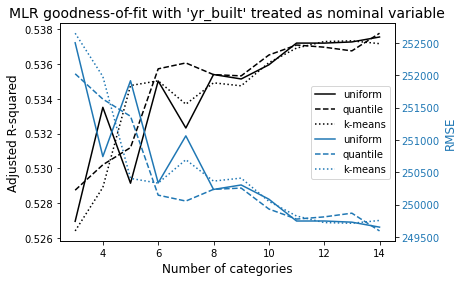

In [43]:
Rsquared=[]
RMSE=[]
maxbins=14
binlist=list(range(3,maxbins+1))
strategies=['uniform','quantile','kmeans']
for strategy in strategies:
    for nr in range(3,maxbins+1):
        discretizer=KBinsDiscretizer(n_bins=nr, encode='onehot', strategy=strategy)
        ct = ColumnTransformer(transformers=[('notransf','passthrough',['sqft_living']),\
                                             ('discretizer',discretizer,['yr_built'])])
        pipe=Pipeline(steps=[('preproc',ct),('regr',linregr)])
        pipe.fit(data,data['price'])
        Rsquared.append(pipe['regr'].score(ct.transform(data),data['price']))
        r_=pipe['regr'].predict(ct.transform(data))[:,np.newaxis]-np.array(data['price'])[:,np.newaxis]
        RMSE.append(float(np.sqrt(r_.T@r_/r_.shape[0])))
Rsquared=np.array(Rsquared).reshape((3,-1))
RMSE=np.array(RMSE).reshape((3,-1))
fig, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(binlist,Rsquared[0,:],'k',label='uniform')
ax1.plot(binlist,Rsquared[1,:],'k--',label='quantile')
ax1.plot(binlist,Rsquared[2,:],'k:',label='k-means')
ax1.set_xlabel('Number of categories',fontsize=12)
ax1.set_ylabel('Adjusted R-squared',fontsize=12)

ax2 = ax1.twinx()
ax2.plot(binlist,RMSE[0,:],color='tab:blue',label='uniform')
ax2.plot(binlist,RMSE[1,:],color='tab:blue',linestyle='--',label='quantile')
ax2.plot(binlist,RMSE[2,:],color='tab:blue',linestyle=':',label='k-means')
ax2.set_ylabel('RMSE',fontsize=12,color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right')

plt.title("MLR goodness-of-fit with 'yr_built' treated as nominal variable",fontsize=14)
plt.show()

From the above plot, we may observe that if the goal is to minimize the number of dummy variables (and thus the number of bins), we shall choose an equal-frequency binning with seven intervals.

We may use this number of bins with the "qcut" method of *pandas* library.

In [44]:
maxbins=7
catnames=pd.qcut(data['yr_built'], q=maxbins,labels=None)
catnames

0          (1939.0, 1955.0]
1          (1939.0, 1955.0]
2        (1899.999, 1939.0]
3          (1955.0, 1967.0]
4          (1980.0, 1993.0]
                ...        
21608      (2005.0, 2015.0]
21609      (2005.0, 2015.0]
21610      (2005.0, 2015.0]
21611      (1993.0, 2005.0]
21612      (2005.0, 2015.0]
Name: yr_built, Length: 21613, dtype: category
Categories (7, interval[float64]): [(1899.999, 1939.0] < (1939.0, 1955.0] < (1955.0, 1967.0] < (1967.0, 1980.0] < (1980.0, 1993.0] < (1993.0, 2005.0] < (2005.0, 2015.0]]

and use this to create automatic categorical names

In [45]:
rounded_inervals=np.rint(np.array([pd.IntervalIndex.to_tuples(catnames.cat.categories)[i] for i in range(maxbins)]))
rounded_inervals.astype('int')
columns=['built_'+str(rounded_inervals.astype('int')[i,0])+'_'+str(rounded_inervals.astype('int')[i,1]) for i in range(maxbins)]
columns

['built_1900_1939',
 'built_1939_1955',
 'built_1955_1967',
 'built_1967_1980',
 'built_1980_1993',
 'built_1993_2005',
 'built_2005_2015']

Then print out the OLS results with 'built_2005_2015' being the baseline.

In [46]:
endformula=''.join([' + '+columns[i] for i in range(len(columns)-1)]) 
discretizer=KBinsDiscretizer(n_bins=len(columns), encode='onehot-dense', strategy='quantile')
data2=pd.DataFrame(data=discretizer.fit_transform(np.array(data['yr_built']).reshape(-1, 1)),columns=columns)
model = ols(formula = 'price ~ sqft_living'+endformula, data=pd.concat([data,data2],axis=1)).fit()
print(model.summary())
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     3566.
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:58   Log-Likelihood:            -2.9930e+05
No. Observations:               21613   AIC:                         5.986e+05
Df Residuals:                   21605   BIC:                         5.987e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -1.14e+05   6511.813    -

From the OLS results, the conclusion is inevitable: all regression coefficients are significantly different from zero except for the category 'built_1955_1967'. Thus, we may state that for houses built before this year interval, the prices are higher compared to the baseline, while for the houses built after it, the prices are lower.

For example, we may use the lower bound of this interval as a threshold for binarization. If the house was built before 1955, then we set it to zero, otherwise to 1. Let's print out the OLS results.

In [47]:
data['NewHouse']=data['yr_built'].apply(lambda x: 1 if x>1955 else 0)
model = ols(formula = 'price ~ sqft_living + NewHouse', data=data).fit()
print(model.summary())
print("\nRMSE = {:.0f}".format(np.sqrt(model.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                 1.222e+04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:23:58   Log-Likelihood:            -2.9943e+05
No. Observations:               21613   AIC:                         5.989e+05
Df Residuals:                   21610   BIC:                         5.989e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.309e+04   4526.995      5.100      

And indeed, using this threshold, a binary variable could be created that provides a model similar to the original one (when the numerical variable was used) and slightly even better.

## 4. Entropy based binning <a name="EntropyBinning"></a>

Supervised binning methods, like entropy-based binning or ChiMerge method transform numerical variables into categorical counterparts using the target variable and refer to the target as (class) information when selecting discretization cut-points.

Entropy can be defined as a measure of the expected information content or uncertainty of a probability distribution. Given entropy as a measure of disorder in a collection of observations, the information gain is simply the expected reduction in entropy caused by partitioning the observations according to an attribute (feature).

As an example, let's take the discrete (binary) random variable, like flipping a coin, with a probability distribution (0.001,0.999), where 0.001 being the probability of having a "tail". Then, one is likely to notice that there is much more "certainty" than "uncertainty" about the outcome of this experiment (so that by flipping a coin, we might be almost sure that a "head" will be the outcome). If, on the other hand, the probability distribution governing that same experiment were (0.5,0.5), like with a fair coin, one would realize that there is much less "certainty" and much more "uncertainty" when compared to the previous example.

We can make a plot of the entropy of this discrete (binary) random variable as a function of the probability $p$ using the definition of the entropy from the book (the probability of the other outcome would be $1-p$).

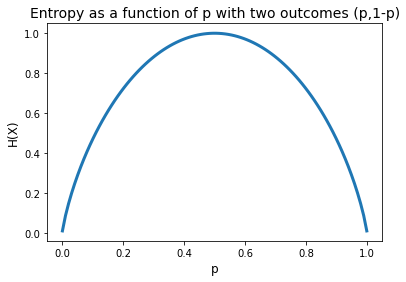

In [48]:
p=np.linspace(0.001,0.999,100)
plt.plot(p,-p*np.log2(p)-(1-p)*np.log2(1-p),lw=3)
plt.xlabel("p",fontsize=12)
plt.ylabel("H(X)",fontsize=12)
plt.title("Entropy as a function of p with two outcomes (p,1-p)",fontsize=14)
plt.show()

As can be seen from the plot above, the entropy is zero, when the outcome is a certain (either "head" for p=0 or "tail" for p=1). On the other hand, the entropy is maximum (in this case equals to 1) when the distribution is uniform (p=0.5).

With the target variable taking on $K$ possible values, the entropy can be as large as $\log_2 K$. With 3 classes, as in case of the iris dataset, the maximum entropy is:

In [49]:
np.log2(3)

1.584962500721156

Let's load the iris dataset from the *scikit-learn* library and print out the dataframe.

**Note:** *The so-called 'Iris' flower dataset was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems". The dataset consists of 50 samples from each of three species of Iris flower (Iris setosa, Iris virginica, and Iris versicolor). Thus, the output, called target, has three categories: setosa, virginica, and versicolor. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.*

In [50]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
iris
irisdata=pd.DataFrame(columns=iris.feature_names,data=iris.data)
irisdata['target']=iris.target_names[iris.target]
irisdata

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


The disctribution of the classes (iris species) in the dataset is uniform:

In [51]:
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

So the entropy of the iris collection is

In [52]:
-3*1/3*np.log2(1/3)

1.5849625007211563

Define a function to calculate the entropy of a set (data series)

In [53]:
def entropy(S):
    val,nr=np.unique(S, return_counts=True)
    prob=np.array([nr[i]/nr.sum() for i in range(len(val))]) # Calculate the probability (proportion) of each class
    return -np.sum(prob*np.log2(prob)) # then return the entropy

and calculate the entropy of the set again, using now our function

In [54]:
entropy(iris.target)

1.584962500721156

The result matches the one that can be obtained with a uniform distribution.

Let's discretize the sepal length by using the entropy based discretization method. That means in each iteration we split the partition using a cut-point which maximizes the information gain (or minimizing the entropy) among all possible cut-points. 

As a first step, we select the feature that we want to discretize and then sort in ascending order.

In [55]:
feature='sepal length (cm)'
sorteddata=irisdata.sort_values(feature)
sorteddata.reset_index(drop=True,inplace=True)
sorteddata

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,4.3,3.0,1.1,0.1,setosa
1,4.4,3.2,1.3,0.2,setosa
2,4.4,3.0,1.3,0.2,setosa
3,4.4,2.9,1.4,0.2,setosa
4,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
145,7.7,2.8,6.7,2.0,virginica
146,7.7,2.6,6.9,2.3,virginica
147,7.7,3.8,6.7,2.2,virginica
148,7.7,3.0,6.1,2.3,virginica


Then define the split function that returns the cut-point value. For simplicity we assume that sorting is already done on the first feature of the pandas dataframe and splitting will be done on the first feature. We also assume that the name of the target variable is "target". Furthermore we will create the cut point on the boundary (average value between the value for which the entropy is maximized and the value of the next or previous closest value (values are ordered in ascending order).

In [56]:
def split(S):
    feature=S.columns[0]
    entropies=[]
    N,_=S.shape
    for i in range(1,N): # Calculating the entropy for each possible cut-point
        S1=S.iloc[:i,:]
        S2=S.iloc[i:,:]
        N1,_=S1.shape
        N2,_=S2.shape
        entropies.append(N1/N*entropy(S1['target'])+N2/N*entropy(S2['target']))
    if len(entropies)!=0:
        idx=np.argmin(entropies)
        cutpoint=S.iloc[idx,:][feature] # Chose the cut-point for which the resulting entropy is minimal
        i=idx+1 # Calculating the cut-point as the midpoint between adjacent values
        while i<N:
            if S.iloc[i,:][feature]!=cutpoint:
                break
            i+=1
        if i==N:
            i=idx-1
            while i>1:
                if S.iloc[i,:][feature]!=cutpoint:
                    break
                i-=1
        cutpoint=(cutpoint+S.iloc[i,:][feature])/2
        return cutpoint
    return None

Let's apply the split function to the first feature (dataframe sorted according to the first feature).

In [57]:
S=sorteddata
cutpoint=split(S)
S1,S2=S[S[feature]<=cutpoint], S[S[feature]>cutpoint]
print("Cut-point",cutpoint)
print('Number of samples in the 1st partition:',S1.shape[0])
print('Entropy of the 1st partition $%.3f'%(entropy(S1['target'])))
print('Number of samples in the 2nd partition:',S2.shape[0])
print('Entropy of the 2nd partition $%.3f'%(entropy(S2['target'])))
infogain=entropy(S['target'])-S1.shape[0]/S.shape[0]*entropy(S1['target'])-S2.shape[0]/S.shape[0]*entropy(S2['target'])
print("Information gain:",infogain)

Cut-point 5.55
Number of samples in the 1st partition: 59
Entropy of the 1st partition $0.813
Number of samples in the 2nd partition: 91
Entropy of the 2nd partition $1.167
Information gain: 0.5572326878069267


Similar result can be obtained if we define a decision tree classifier (which is part of the 2nd volume of the book series) with entropy as the criterion of splitting, respective setting maximum depth of the tree to 1.

In [58]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier(criterion='entropy',max_depth=1)
treeclassifier.fit(np.array(irisdata[feature]).reshape(-1, 1),iris.target)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

Then we can plot the created decision tree, which is aligned with our previous result.

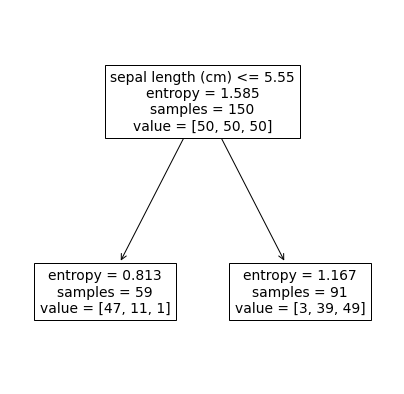

In [59]:
from sklearn import tree
fig = plt.figure(figsize=(7,7))
tree.plot_tree(treeclassifier, feature_names=iris.feature_names)
plt.show()

We can apply the above method recursively if we define a stopping criteria, like Minimal Description Length Principal (MDLP) discussed in the book. First, let's create again the first split and check if the stopping criteria is met or not.

In [60]:
S=sorteddata
val,nr=np.unique(S['target'], return_counts=True)
K=len(val)
N=nr.sum()
cutpoint=split(S)
S1,S2=S[S[feature]<=cutpoint], S[S[feature]>cutpoint]
K1=len(S1['target'].unique())
K2=len(S2['target'].unique())
stop=np.log2(N-1)/N+(np.log2(3**K-2)-int(K*entropy(S['target'])+K1*entropy(S1['target'])+K2*entropy(S2['target'])))/N
infogain=entropy(S['target'])-S1.shape[0]/S.shape[0]*entropy(S1['target'])-S2.shape[0]/S.shape[0]*entropy(S2['target'])
print("Infogain and stopping criteria after splitting:",infogain,stop)

Infogain and stopping criteria after splitting: 0.5572326878069267 0.012420164734912573


As can be seen, the information gain is higher than the stopping criteria, so a split will improve the classification.

Now, let's define the recursive entropy binning function with the above stopping criteria: 

In [61]:
def entropybinning(S, verbose=False):
    feature=S.columns[0]
    cutpoint=split(S)
    S1,S2=S[S[feature]<=cutpoint], S[S[feature]>cutpoint]
    K1=len(S1['target'].unique())
    K2=len(S2['target'].unique())
    stop=np.log2(N-1)/N+(np.log2(3**K-2)-int(K*entropy(S['target'])+K1*entropy(S1['target'])+K2*entropy(S2['target'])))/N
    infogain=entropy(S['target'])-S1.shape[0]/S.shape[0]*entropy(S1['target'])-S2.shape[0]/S.shape[0]*entropy(S2['target'])
    if verbose:
        print("Infogain and stopping criteria after splitting:",infogain,stop)
    if infogain<stop:
        if verbose:
            print("Reached stopping criteria\n")
        return
    else:
        if verbose:
            print('Recursively applying partitioning for the cut-point:',cutpoint)
            print()
        return cutpoint,entropybinning(S1,verbose),entropybinning(S2,verbose)

and apply to the sorted iris dataset

In [62]:
nestedresult=entropybinning(sorteddata,verbose=True)
print("\nResult of the cut-points:",nestedresult)

Infogain and stopping criteria after splitting: 0.5572326878069267 0.012420164734912573
Recursively applying partitioning for the cut-point: 5.55

Infogain and stopping criteria after splitting: 0.13788086600590665 0.039086831401579245
Recursively applying partitioning for the cut-point: 5.45

Infogain and stopping criteria after splitting: 0.0779543233707265 0.052420164734912574
Recursively applying partitioning for the cut-point: 4.85

Infogain and stopping criteria after splitting: 0.0 0.07908683140157924
Reached stopping criteria

Infogain and stopping criteria after splitting: 0.07543412597553212 0.03242016473491258
Recursively applying partitioning for the cut-point: 4.95

Infogain and stopping criteria after splitting: 0.0 0.03242016473491258
Reached stopping criteria

Infogain and stopping criteria after splitting: 0.002819520208299786 0.052420164734912574
Reached stopping criteria

Infogain and stopping criteria after splitting: 0.0 0.052420164734912574
Reached stopping criter

We may want to have the result of the cut-points as a sorted array without all the None values.

In [63]:
def flattening(nestedresult):
    flatlist=[]
    for i in range(len(nestedresult)):
        if nestedresult[i]!=None:
            if type(nestedresult[i])==tuple:
                flatlist.extend(flattening(nestedresult[i]))
            else:
                flatlist.append(nestedresult[i])
    return flatlist
np.sort(np.array(flattening(nestedresult)))

array([4.85, 4.95, 5.45, 5.55, 5.65, 5.75, 5.85, 6.25, 7.05])

We may obtain a slightly similar result with a decision tree classifier if we define the appropriate stopping criteria for the informtaion gain. However, the stopping criteria is set globally for the whole tree and not for each branch (partition).

In [64]:
stop=0.01
treeclassifier=DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=stop)
treeclassifier.fit(np.array(irisdata[feature]).reshape(-1, 1),iris.target)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01)

We may plot the decision tree

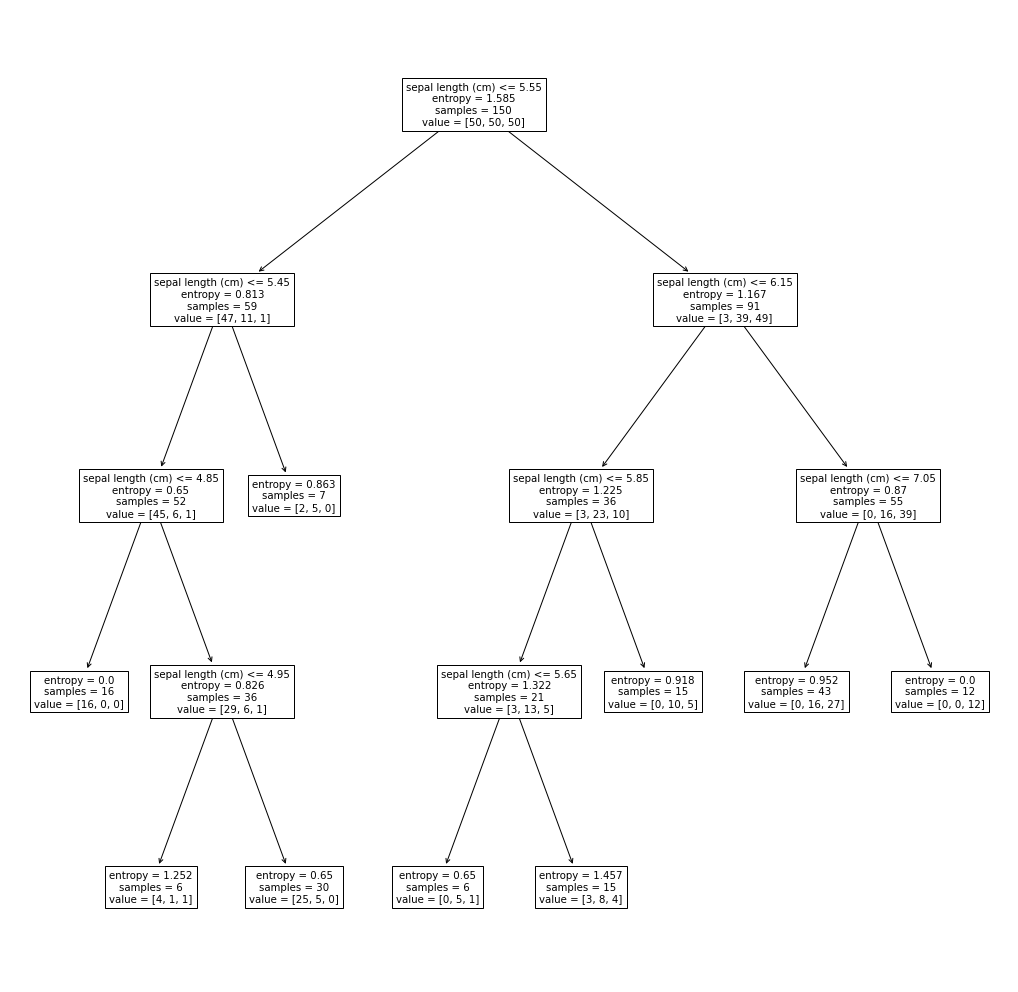

In [65]:
fig = plt.figure(figsize=(18,18))
tree.plot_tree(treeclassifier, feature_names=iris.feature_names)
plt.show()

Now, using the interval edges with *pandas* 'cut' method, we can discretize the numerical feature

In [66]:
binedges=np.sort(np.array(flattening(nestedresult)))
binedges=np.insert(binedges,0,irisdata['sepal length (cm)'].min()-0.01)
binedges=np.append(binedges,irisdata['sepal length (cm)'].max()+0.01)
pd.cut(irisdata['sepal length (cm)'],bins=binedges)

0      (4.95, 5.45]
1      (4.85, 4.95]
2      (4.29, 4.85]
3      (4.29, 4.85]
4      (4.95, 5.45]
           ...     
145    (6.25, 7.05]
146    (6.25, 7.05]
147    (6.25, 7.05]
148    (5.85, 6.25]
149    (5.85, 6.25]
Name: sepal length (cm), Length: 150, dtype: category
Categories (10, interval[float64]): [(4.29, 4.85] < (4.85, 4.95] < (4.95, 5.45] < (5.45, 5.55] ... (5.75, 5.85] < (5.85, 6.25] < (6.25, 7.05] < (7.05, 7.91]]

We may print out the bin edges of the entropy-based discretization

In [67]:
binedges

array([4.29, 4.85, 4.95, 5.45, 5.55, 5.65, 5.75, 5.85, 6.25, 7.05, 7.91])

Let's define our entropydiscretizer which returns the bin edges. X is one dimensional (only one feature).

In [68]:
def entropyDiscretizer(X,y):
    data=pd.DataFrame(columns=['feature','target'],data=np.vstack((np.array(X),np.array(y))).T)
    feature='feature'
    binedges=np.sort(np.array(flattening(entropybinning(data.iloc[data.feature.argsort(),:]))))
    binedges=np.insert(binedges,0,data.feature.min()-0.01)
    binedges=np.append(binedges,data.feature.max()+0.01)
    return binedges

and apply on the first feature the discretization using *pandas* 'cut' method 

In [69]:
feature='petal width (cm)'
X=irisdata[feature]
y=irisdata['target']
pd.cut(X,bins=entropyDiscretizer(X,y))#.isnull().sum()
#entropyDiscretizer(X,y)

0       (0.09, 0.8]
1       (0.09, 0.8]
2       (0.09, 0.8]
3       (0.09, 0.8]
4       (0.09, 0.8]
           ...     
145    (1.75, 2.51]
146    (1.75, 2.51]
147    (1.75, 2.51]
148    (1.75, 2.51]
149    (1.75, 2.51]
Name: petal width (cm), Length: 150, dtype: category
Categories (4, interval[float64]): [(0.09, 0.8] < (0.8, 1.35] < (1.35, 1.75] < (1.75, 2.51]]

We may now create our EntropyBinning class in the *scikit-learn* environment, which makes ordinal encoding. For simplicity, we will not implement checking for data inconsistencies.

In [70]:
from sklearn.base import TransformerMixin,BaseEstimator
class EntropyBinning(BaseEstimator, TransformerMixin):
    def __init__(self):
            self.binedges_ = []
            self.N=0
            self.D=0
    def fit(self, X, y):
        self.N,self.D=X.shape
        self.binedges_=[entropyDiscretizer(np.array(X)[:,i],y) for i in range(self.D)]
        return self
    def transform(self, X):
        return np.array([pd.cut(np.array(X)[:,i],bins=self.binedges_[i],labels=False) for i in range(self.D)])

Let's instantiate this class and fit the dataset

In [71]:
myentropybinning=EntropyBinning()
myentropybinning.fit(X=irisdata.drop('target',axis=1),y=irisdata['target'])

EntropyBinning()

We may check the bin edges

In [72]:
myentropybinning.binedges_

[array([4.29, 4.85, 4.95, 5.45, 5.55, 5.65, 5.75, 5.85, 6.25, 7.05, 7.91]),
 array([1.99, 2.1 , 2.25, 2.35, 2.45, 2.55, 2.85, 2.95, 3.05, 3.15, 3.25,
        3.35, 3.45, 4.41]),
 array([0.99, 2.45, 4.75, 4.85, 4.95, 5.15, 6.91]),
 array([0.09, 0.8 , 1.35, 1.75, 2.51])]

Then we can transform the dataset into categorical variable with ordinal encoding

In [73]:
myentropybinning.transform(X=irisdata.drop(['target'],axis=1))

array([[ 2,  1,  0,  0,  2,  2,  0,  2,  0,  1,  2,  0,  0,  0,  6,  5,
         2,  2,  5,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  0,  0,  2,
         2,  3,  1,  2,  3,  1,  0,  2,  2,  0,  0,  2,  2,  0,  2,  0,
         2,  2,  8,  8,  8,  3,  8,  5,  8,  1,  8,  2,  2,  7,  7,  7,
         4,  8,  4,  6,  7,  4,  7,  7,  8,  7,  8,  8,  8,  8,  7,  5,
         3,  3,  6,  7,  2,  7,  8,  8,  4,  3,  3,  7,  6,  2,  4,  5,
         5,  7,  2,  5,  8,  6,  9,  8,  8,  9,  1,  9,  8,  9,  8,  8,
         8,  5,  6,  8,  8,  9,  9,  7,  8,  4,  9,  8,  8,  9,  7,  7,
         8,  9,  9,  9,  8,  8,  7,  9,  8,  8,  7,  8,  8,  8,  6,  8,
         8,  8,  8,  8,  7,  7],
       [12,  7,  9,  8, 12, 12, 11, 11,  6,  8, 12, 11,  7,  7, 12, 12,
        12, 12, 12, 12, 11, 12, 12, 10, 11,  7, 11, 12, 11,  9,  8, 11,
        12, 12,  8,  9, 12, 12,  7, 11, 12,  2,  9, 12, 12,  7, 12,  9,
        12, 10,  9,  9,  8,  2,  5,  5, 10,  3,  6,  5,  0,  7,  1,  6,
         6,  8,  7,  5,  1,  4,

## 5. ChiMerge discretization <a name="ChiMerge"></a>

The ChiMerge discretization is another supervised discretization method based on $\chi^2$ statistical test already discussed in lab exercise 3.7 at statistical independence test with contingency tables. The ChiMerge algorithm consists of an initialization step and a bottom-up merging process, where intervals are continuously merged until a termination condition is met. ChiMerge is initialized by first sorting the observations of a feature and placing each into a distinct interval (i.e., an interval boundary is created before and after each example). Then the interval merging process contains two steps, repeated continuously:
- compute the $\chi^2$ value for each pair of adjacent intervals;
- merge (combine) the pair of adjacent intervals with the lowest $\chi^2$ value;
Merging continues until all pairs of intervals have $\chi^2$ values exceeding the parameter $\chi^2$-threshold; that is, all adjacent intervals are considered significantly different by the $\chi^2$ independence test.

As a first step, let's create an interval for each value of the first feature then make the contingency table between the first feature and the target value using the 'crosstab' method of *pandas* library.

In [74]:
pd.crosstab(irisdata['sepal length (cm)'],irisdata['target'])

target,setosa,versicolor,virginica
sepal length (cm),,,
4.3,1,0,0
4.4,3,0,0
4.5,1,0,0
4.6,4,0,0
4.7,2,0,0
4.8,5,0,0
4.9,4,1,1
5.0,8,2,0
5.1,8,1,0


The next step would be to calculate the chi2 value between each adjacent interval (chi2 value between each adjacent row). First, create the intervals:

In [75]:
distinct_vals=np.sort(irisdata['sepal length (cm)'].unique())
intervals = np.array([[distinct_vals[i], distinct_vals[i]] for i in range(len(distinct_vals))])
intervals

array([[4.3, 4.3],
       [4.4, 4.4],
       [4.5, 4.5],
       [4.6, 4.6],
       [4.7, 4.7],
       [4.8, 4.8],
       [4.9, 4.9],
       [5. , 5. ],
       [5.1, 5.1],
       [5.2, 5.2],
       [5.3, 5.3],
       [5.4, 5.4],
       [5.5, 5.5],
       [5.6, 5.6],
       [5.7, 5.7],
       [5.8, 5.8],
       [5.9, 5.9],
       [6. , 6. ],
       [6.1, 6.1],
       [6.2, 6.2],
       [6.3, 6.3],
       [6.4, 6.4],
       [6.5, 6.5],
       [6.6, 6.6],
       [6.7, 6.7],
       [6.8, 6.8],
       [6.9, 6.9],
       [7. , 7. ],
       [7.1, 7.1],
       [7.2, 7.2],
       [7.3, 7.3],
       [7.4, 7.4],
       [7.6, 7.6],
       [7.7, 7.7],
       [7.9, 7.9]])

Using the 'between' method from the *pandas* library, we can collect those values that are in a given interval. For example, the observations in the first interval are:

In [76]:
i=0
interval1=irisdata[irisdata['sepal length (cm)'].between(intervals[i][0], intervals[i][1])]
interval1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
13,4.3,3.0,1.1,0.1,setosa


while in the second interval are:

In [77]:
interval2=irisdata[irisdata['sepal length (cm)'].between(intervals[i+1][0], intervals[i+1][1])]
interval2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
8,4.4,2.9,1.4,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa


Then we should create the crosstab between the two intervals. For this, first, we create a helper variable (a dictionary with target labels all with zero values attached):

In [78]:
label='target'
labels = irisdata[label].unique()
empty_count = {l: 0 for l in labels}
empty_count

{'setosa': 0, 'versicolor': 0, 'virginica': 0}

Then count the class labels occurrences for each interval

In [79]:
from collections import Counter
count1=np.array([v for i, v in {**empty_count, **Counter(interval1[label])}.items()])
count2=np.array([v for i, v in {**empty_count, **Counter(interval2[label])}.items()])
crosstab=np.vstack([count1,count2])
crosstab

array([[1, 0, 0],
       [3, 0, 0]])

Based on the result, we calculate the expected frequencies. Because there are zero values in the frequencies, we should add a very small value to avoid division by zero.

In [80]:
expected=crosstab.sum(axis=0,keepdims=True)*crosstab.sum(axis=1,keepdims=True)/crosstab.sum()+1e-3
expected

array([[1.001e+00, 1.000e-03, 1.000e-03],
       [3.001e+00, 1.000e-03, 1.000e-03]])

Finally, from the expected values, we can calculate the chi2 values:

In [81]:
chi2=np.sum((crosstab-expected)**2/expected)
chi2

0.0040013322232582485

Now, do the same chi2 calculation for all intervals and get back the index of the interval with the lowest chi2 value (this would represent one iteration of the ChiMerge binning).

In [82]:
data=irisdata
feature='sepal length (cm)'
label='target'

labels = irisdata['target'].unique()
empty_count = {l: 0 for l in labels}
chi2vals = []
for i in range(len(intervals)-1):
    interval1=data[data[feature].between(intervals[i][0], intervals[i][1])]
    interval2=data[data[feature].between(intervals[i+1][0], intervals[i+1][1])]
    count1=np.array([v for i, v in {**empty_count, **Counter(interval1[label])}.items()])
    count2=np.array([v for i, v in {**empty_count, **Counter(interval2[label])}.items()])
    crosstab=np.vstack([count1,count2])
    expected=crosstab.sum(axis=0,keepdims=True)*crosstab.sum(axis=1,keepdims=True)/crosstab.sum()+1e-15
    chi2=np.sum((crosstab-expected)**2/expected)
    chi2vals.append(chi2)
idx=np.array(chi2vals).argmin()
idx

17

Then we can create the new set of intervals by merging the two adjacent intervals with the lowest chi2 value.

In [83]:
intervals[idx][1]=intervals[idx+1][1]
np.delete(intervals,idx+1,axis=0)

array([[4.3, 4.3],
       [4.4, 4.4],
       [4.5, 4.5],
       [4.6, 4.6],
       [4.7, 4.7],
       [4.8, 4.8],
       [4.9, 4.9],
       [5. , 5. ],
       [5.1, 5.1],
       [5.2, 5.2],
       [5.3, 5.3],
       [5.4, 5.4],
       [5.5, 5.5],
       [5.6, 5.6],
       [5.7, 5.7],
       [5.8, 5.8],
       [5.9, 5.9],
       [6. , 6.1],
       [6.2, 6.2],
       [6.3, 6.3],
       [6.4, 6.4],
       [6.5, 6.5],
       [6.6, 6.6],
       [6.7, 6.7],
       [6.8, 6.8],
       [6.9, 6.9],
       [7. , 7. ],
       [7.1, 7.1],
       [7.2, 7.2],
       [7.3, 7.3],
       [7.4, 7.4],
       [7.6, 7.6],
       [7.7, 7.7],
       [7.9, 7.9]])

So far, so good! Now, let's define the ChiMerge discretizer function based on the previous code examples. We may set for the stopping criteria both the confidence level (as the threshold for $\chi^2$ value) and the maximum number of intervals. 

In [84]:
def chimerge(data, feature, label, max_intervals, percentile):
    if max_intervals<3:
        print("Number of max intervals shall be greater than 3!")
        return None
    from scipy.stats import chi2
    labels = sorted(set(data[label]))
    df=len(labels)-1
    threshold=chi2.ppf(percentile,df)
    empty_count = {l: 0 for l in labels}
    distinct_vals=np.sort(data[feature].unique())
    intervals = np.array([[distinct_vals[i], distinct_vals[i]] for i in range(len(distinct_vals))])
    while True:
        chi2vals = []
        for i in range(len(intervals)-1):
            interval1=data[data[feature].between(intervals[i][0], intervals[i][1])]
            interval2=data[data[feature].between(intervals[i+1][0], intervals[i+1][1])]
            count1=np.array([v for i, v in {**empty_count, **Counter(interval1[label])}.items()])
            count2=np.array([v for i, v in {**empty_count, **Counter(interval2[label])}.items()])
            crosstab=np.vstack([count1,count2])
            expected=crosstab.sum(axis=0,keepdims=True)*crosstab.sum(axis=1,keepdims=True)/crosstab.sum()+1e-15
            chi2=np.sum((crosstab-expected)**2/expected)
            chi2vals.append(chi2)
        if np.array(chi2vals).min()>threshold and len(intervals) < max_intervals:
            break #return intervals
        idx=np.array(chi2vals).argmin()
        intervals[idx][1]=intervals[idx+1][1]
        intervals=np.delete(intervals,idx+1,axis=0)
    return intervals

Finally, apply the function just created to all the features of the iris dataset. We may set 10 for the max interval number, respective 0.9 for the confidence level.

In [85]:
features=list(irisdata.columns)
features.remove('target')
for attr in features:
    print('Intervals for', attr)
    print(chimerge(data=irisdata, feature=attr, label='target', max_intervals=10, percentile=0.90))

Intervals for sepal length (cm)
[[4.3 4.8]
 [4.9 4.9]
 [5.  5.4]
 [5.5 5.7]
 [5.8 6.2]
 [6.3 7. ]
 [7.1 7.9]]
Intervals for sepal width (cm)
[[2.  2.4]
 [2.5 2.8]
 [2.9 2.9]
 [3.  3.3]
 [3.4 4.4]]
Intervals for petal length (cm)
[[1.  1.9]
 [3.  4.7]
 [4.8 5.1]
 [5.2 6.9]]
Intervals for petal width (cm)
[[0.1 0.6]
 [1.  1.3]
 [1.4 1.7]
 [1.8 2.5]]


That's all, folks!

<img src = "images/AML1-Cover.png" width = 110, align = "left" style="margin:0px 20px">

<span style="color:blue">**Note:**</span> This Jupyter Notebook is accompanying the book: <br> $\qquad$ <b>Advanced Machine Learning Made Easy</b> <br> $\qquad$ From Theory to Practice with NumPy and scikit-learn <br> $\qquad$ <i> Volume 1: Generalized Linear Models</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).